# Model Fitness- Forecast & Prediction project

## project description:
The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
One of the most common problems gyms and other services face is customer churn.
Churn is defined by the gym when a customer doesn't come for a month.
In order to fight churn, Model Fitness has digitized a number of its customer profiles. 
Our task is to analyze them and come up with a customer retention strategy.
In this project we will:
- •	predict the probability of churn (for the upcoming month) for each customer
- •	Draw up typical user portraits: select the most outstanding groups and describe their main features
- •	Analyze the factors that impact churn most
- •	Draw basic conclusions and develop recommendations on how to improve customer service:
    - o	Identify target groups
    - o	Suggest measures to cut churn
    - o	Describe any other patterns you see with respect to interaction with customers


## Step 1: Loading libraries and data:

In [1]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 



In [3]:
try:
    gym = pd.read_csv(r"C:\Users\USER\OneDrive\מסמכים\DATA ANALYST\Practicum100\Forcasts and predictions\project\gym_churn_us.csv")
except:
    gym= pd.read_csv('/datasets/gym_churn_us.csv')
    

## Step 2. Carrying out exploratory data analysis (EDA)


In [4]:
gym.info()
gym.head()
gym.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

count        mean        std        min  \
gender                             4000.0    0.510250   0.499957   0.000000   
Near_Location                      4000.0    0.845250   0.361711   0.000000   
Partner                            4000.0    0.486750   0.499887   0.000000   
Promo_friends                      4000.0    0.308500   0.461932   0.000000   
Phone                              4000.0    0.903500   0.295313   0.000000   
Contract_period                    4000.0    4.681250   4.549706   1.000000   
Group_visits                       4000.0    0.412250   0.492301   0.000000   
Age                                4000.0   29.184250   3.258367  18.000000   
Avg_additional_charges_total       4000.0  146.943728  96.355602   0.148205   
Month_to_end_contract              4000.0    4.322750   4.191297   1.000000   
Lifetime                           4000.0    3.724750   3.749267   0.000000   
Avg_class_frequency_total          4000.0    1.879020   0.972245   0.000000   
Avg_class_frequency_current_month  4000.0    1.767052   1.052906   0.000000   
Churn                              4000.0    0.265250   0.441521   0.000000   

                                         25%         50%         75%  \
gender                              0.000000    1.000000    1.000000   
Near_Location                       1.000000    1.000000    1.000000   
Partner                             0.000000    0.000000    1.000000   
Promo_friends                       0.000000    0.000000    1.000000   
Phone                               1.000000    1.000000    1.000000   
Contract_period                     1.000000    1.000000    6.000000   
Group_visits                        0.000000    0.000000    1.000000   
Age                                27.000000   29.000000   31.000000   
Avg_additional_charges_total       68.868830  136.220159  210.949625   
Month_to_end_contract               1.000000    1.000000    6.000000   
Lifetime                            1.000000    3.000000    5.000000   
Avg_class_frequency_total           1.180875    1.832768    2.536078   
Avg_class_frequency_current_month   0.963003    1.719574    2.510336   
Churn                               0.000000    0.000000    1.000000   

                                          max  
gender                               1.000000  
Near_Location                        1.000000  
Partner                              1.000000  
Promo_friends                        1.000000  
Phone                                1.000000  
Contract_period                     12.000000  
Group_visits                         1.000000  
Age                                 41.000000  
Avg_additional_charges_total       552.590740  
Month_to_end_contract               12.000000  
Lifetime                            31.000000  
Avg_class_frequency_total            6.023668  
Avg_class_frequency_current_month    6.146783  
Churn                                1.000000

### General remarks on data:
- There are 4000 rows and 14 columns.
- There are no missing values.
- 7 of the variables seem like boolean ones, yet are defined as integers.
- Their distributions tell us: 
    - About half of the users are women, 
    - most of the users (84%) live of work near the gym, 
    - a little more than half are not employees of a partner company, 
    - around 70% didn't sign up through a "bring a friend" offer,  
    - 90% provided a phone number, 
    - 41% participate in group sessions, and 
    - churn rate is around 26%.
- The numeric variables' distributions show: 
    - The Contract_period is skewed to the right, with at least 50% of users purchasing a one month membership, and quite a wide variance. this variable's dtype could also be converted to "category"
    - Age has a normal distribution, with a mean age of 29, and a range of 18 to 41.
    - Avg_additional_charges_total: skewed to the right, with an average of 147 money spent on other gym services, and a lower median (136).
    - Month_to_end_contract: also skewed to the right, similarly to the Contract_period variable.
    - Lifetime- almost normal distibution, a bit skewed to the right, with a large variance. The mean number of months customers tend to be registered is 3.72, with a distribution ranging between 0 and 31 (2 years and 7 months sounds low..).
    - Avg_class_frequency_total: visits per week ranges from 0 to 6, with a normal dist. and a mean value of 1.88 per week.
    - Avg_class_frequency_current_month: in the preceding month the frequency of visits was a bit lower. 
- Since there is no customer_id field, we cannot check for duplicates, or for possible double-clasification of customers as both Churn and non-churn. that's too bad...
    

In [5]:
# changing dtypes to boolean: (had problems creating histograms, so decided to leave them as int..)
#bool_vars= ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Churn']
#for col in gym:
#    if col in bool_vars:
#        gym[col]= gym[col].astype(bool)



### Additional EDA: 

In [6]:

pip install pandas-profiling

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\USER\\anaconda3\\Lib\\site-packages\\~0rkupsafe\\_speedups.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Using cached MarkupSafe-2.1.1-cp39-cp39-win_amd64.whl (17 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1


In [7]:

pip install markupsafe==2.0.1

  Using cached MarkupSafe-2.0.1-cp39-cp39-win_amd64.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.Installing collected packages: markupsafe

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
cookiecutter 1.7.2 requires MarkupSafe<2.0.0, but you have markupsafe 2.0.1 which is incompatible.


In [8]:
# histograms are shown inside
from pandas_profiling import ProfileReport
profile = ProfileReport(gym, title= "Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### ProfileReport indicated quite a few correlations: 
#### (although 0.4 doesn't seem like high correlation to me, maybe medium size)
- Contract_period is highly correlated with Month_to_end_contract	High correlation 
- Churn is highly correlated with Lifetime	High correlation
- Churn is highly correlated with Age	High correlation
- Avg_class_frequency_total is highly correlated with Avg_class_frequency_current_month	High correlation
- Partner is highly correlated with Promo_friends	High correlation

### Also:
- Lifetime has 487 (12.2%) zeros	Zeros
- Avg_class_frequency_total has 88 (2.2%) zeros	Zeros
- Avg_class_frequency_current_month has 181 (4.5%) zeros	Zeros


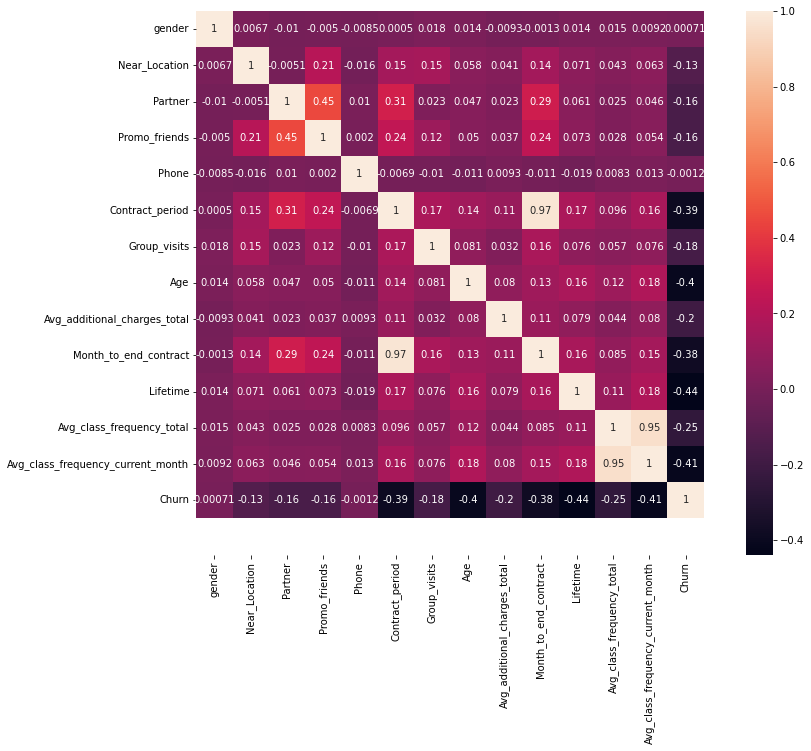

In [9]:
# correlational matrix
cm = gym.corr() 
fig, ax = plt.subplots(figsize=(15,10))

# plot an annotated heatmap for the correlation matrix
sns.heatmap(cm, annot = True, square=True)  
ax.set_ylim(15, 0) # correcting "ragged" heatmap fields in the latest version of the library
plt.show();


***The heatmap illustrates the correlation matrix:*** 
- we see a very high positive correlations between "Month to end contract" and "Contract period", which makes sense- longer contract periods tend to go together with higher number of months months remaining until membership expires, compared with shorter contract periods. 
- Also, a very high positive correlation between Avg_class_frequency_total and Avg_class_frequency_current_month, which makes sense as one is included in the other. Also, it indicates that the current month "behaves" like the rest of the months sampled.
- OTHER CORRELATIONS were found to be indeed of medium size (~0.4), both positive and negative in direction.
- As for the variable in our focus- Churn: negative medium sized correlations were found with 3 variables: (lower) Lifetime (-0.44), (lower) Avg_class_frequency_current_month (-0.42) (younger) Age(-0.4). 

### Churn Vs. Non-churn customer:  


In [10]:
# Looking into the churn customers' data (TRUE), compared with the non-churn customers(FALSE):

gym.groupby('Churn')['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Contract_period'].agg(['mean', 'std'])
gym.groupby('Churn')['Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month' ].agg(['mean', 'std'])


C:\Users\USER\AppData\Local\Temp/ipykernel_3440/2969745959.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gym.groupby('Churn')['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Contract_period'].agg(['mean', 'std'])


gender           Near_Location             Partner            \
           mean       std          mean       std      mean       std   
Churn                                                                   
0      0.510037  0.499984      0.873086  0.332933  0.534195  0.498914   
1      0.510839  0.500118      0.768143  0.422217  0.355325  0.478837   

      Promo_friends               Phone           Group_visits            \
               mean       std      mean       std         mean       std   
Churn                                                                      
0          0.353522  0.478144  0.903709  0.295040     0.464103  0.498795   
1          0.183789  0.387495  0.902922  0.296204     0.268615  0.443448   

      Contract_period            
                 mean       std  
Churn                            
0            5.747193  4.716942  
1            1.728558  2.132371

C:\Users\USER\AppData\Local\Temp/ipykernel_3440/2969745959.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gym.groupby('Churn')['Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month' ].agg(['mean', 'std'])


Age           Avg_additional_charges_total             \
            mean       std                         mean        std   
Churn                                                                
0      29.976523  3.009933                   158.445715  99.801599   
1      26.989632  2.895163                   115.082899  77.696419   

      Month_to_end_contract            Lifetime            \
                       mean       std      mean       std   
Churn                                                       
0                  5.283089  4.363522  4.711807  3.874780   
1                  1.662582  1.964593  0.990575  1.110799   

      Avg_class_frequency_total           Avg_class_frequency_current_month  \
                           mean       std                              mean   
Churn                                                                         
0                      2.024876  1.016006                          2.027882   
1                      1.474995  0.694705                          1.044546   

                 
            std  
Churn            
0      1.018994  
1      0.770237

#### Plot bar histograms and feature distributions for those who left (churn) and those who stayed.

In [11]:

categorical = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Contract_period']
numerical= ['Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

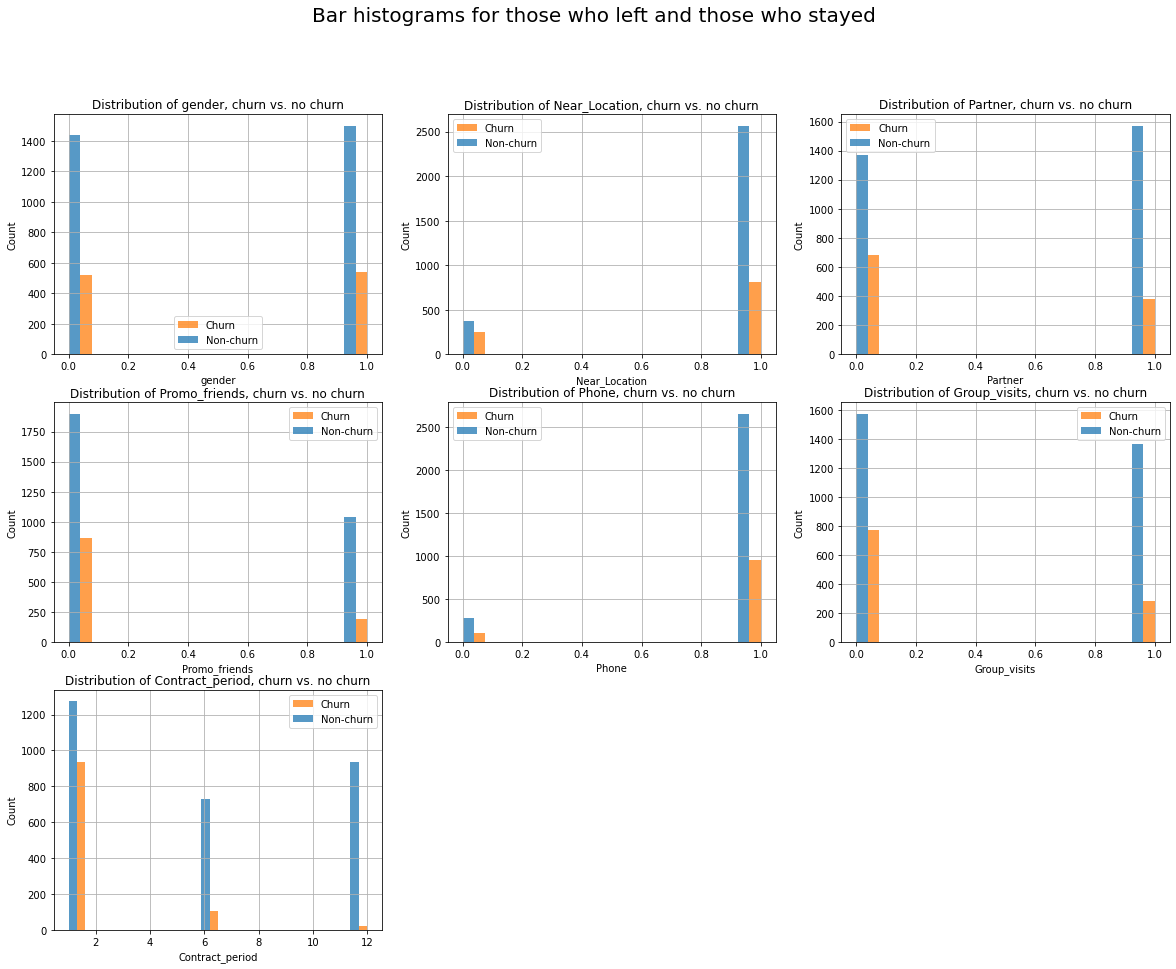

In [12]:
# Plotting bar histograms for those who left and for those who stayed
count=1
plt.subplots(figsize=(20, 15))
for col in categorical:
    plt.subplot(3,3,count)
    sns.histplot(data= gym, x=col, hue='Churn', multiple="dodge", linewidth=0)
    plt.grid()
    plt.title('Distribution of '+ col +', churn vs. no churn')
    plt.legend(labels=['Churn', 'Non-churn'])
    count+=1
    plt.suptitle("Bar histograms for those who left and those who stayed", fontsize =20)
plt.show();

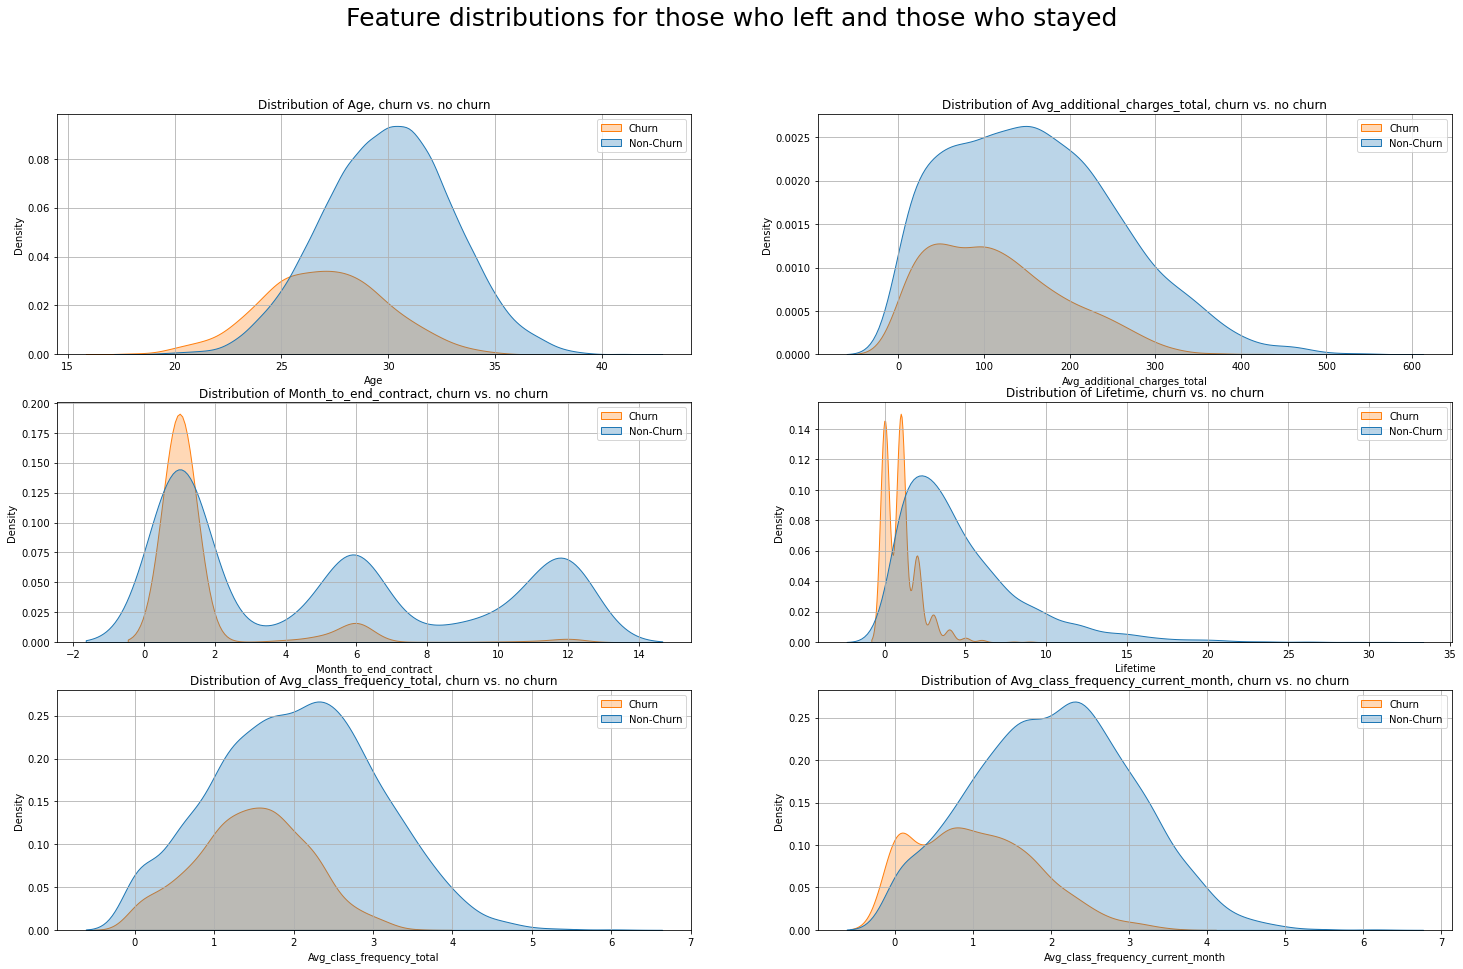

In [13]:
# Plotting feature distributions for those who left and for those who stayed
count=1
plt.subplots(figsize=(25, 15))
for col in numerical:
    plt.subplot(3,2,count)
    sns.kdeplot(data=gym, x=col, hue='Churn', fill=True, alpha=.3)
    plt.grid()
    plt.title('Distribution of '+ col +', churn vs. no churn')
    plt.legend(labels=['Churn', 'Non-Churn'])
    count+=1
    plt.suptitle("Feature distributions for those who left and those who stayed", fontsize =25)
plt.show();

#### Churn Vs. Non-Churn: Summary:
***In general, only Gender and Phone did not distinguish between the groups.***
- 'gender': A similar rate of men and women quit the gym. Gender is probably not a factor in leaving.
- 'Near_Location': There is a greater chance of quitting if you work/live far from the gym. Far location might be a churn predicting factor.
- 'Partner': Being an employee of a partner company correlates with lowered chances of quitting. Not being a Partner might be a churn predicting factor.
- 'Promo_friends':Signing up through a friend goes with lowered chances of quitting. Not using a promo coupon might be a churn predicting factor.
- 'Phone': providing a phone number is not a factor in leaving.
- 'Group_visits': taking part in group sessions is correlated with lower churn rates. Not attending 'Group_visits' might be a churn predicting factor.
- 'Contract_period': A much higher churn rate is found for contact period of 1 month, compared with 6 and 12 mo. Shorter contact periods might be a churn predicting factor.

- 'Age': Churn peaks at a slightly younger age (27 compared with 30). Age might be a churn predicting factor.
- 'Avg_additional_charges_total'- mean charges were higher for non-churning customers (158 compared with 115). Additional charges might be a churn predicting factor.
- 'Month_to_end_contract': for both samples there are 3 peaks: around 1 month to end contract we see a very high churn rate, around 6 months- a lower churn rate, and almost a non-existing churn when 12 membership months are left. Months to end might be a churn predicting factor.
- 'Lifetime': Churning and non-churning customers behave very differently on this parameter: the distributions are different, as are the number and locations of peaks and the mean number of months passed since the first visit. In general, the customers that quit the gym, most of them were active for no more than a month, where as the customers that didn't were active for an average of 5 months. Also, It seems that there aren't too many loyal customers (unless it's a new chain): they first registered about 1.5-2.5 years ago. However, they don't tend to leave after 5 months. 
- 'Avg_class_frequency_total'- there is a difference between the two groups: most customers that left, tended to visit the gym 1.5 times a week, whereas most of the still active members visit 2-2.5 times. 
- 'Avg_class_frequency_current_month'- This month there was a larger gap between the groups, with the quitting customers visiting about once a week, or not at all.

## Step 3. Building a model to predict user churn
Build a binary classification model for customers where the target feature is the user's leaving next month.
•	Divide the data into train and validation sets using the train_test_split() function.
•	Train the model on the train set with two methods:
o	logistic regression
o	random forest
•	Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?
Remember to indicate the random_state parameter when dividing data and defining the algorithm.


In [14]:
# dividing the data into features (the X matrix) and a target variable (y)
X = gym.drop(['Churn'], axis=1)
y = gym['Churn']


In [15]:
# dividing the data into train and test sets and train StandardScaler on the train set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)  
X_test_st = scaler.transform(X_test)

### - Logistic Regression

In [16]:

# defining the model's algorithm 
model = LogisticRegression()

# training the model
model.fit(X_train_st, y_train)

# using the trained model to make forecasts
LR_predict = model.predict(X_test_st)



LogisticRegression()

In [17]:
# printing the studied metrics for the resulting prediction
#(Accuracy only works when classes are balanced, which isn't the case, but for the sake of practice...)
print("Logistic Regression model- goodness of fit metrices")
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, LR_predict)))
print('Precision: {:.2f}'.format(precision_score (y_test, LR_predict)))
print('Recall: {:.2f}'.format(recall_score (y_test, LR_predict)))


Logistic Regression model- goodness of fit metrices
Accuracy: 0.92
Precision: 0.85
Recall: 0.83


### - Random Forest model

In [18]:
# defining the model's algorithm and training it:
RF_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
RF_model.fit(X_train_st, y_train)
RF_predict = RF_model.predict(X_test_st) 


RandomForestClassifier(random_state=0)

In [19]:
# printing the studied metrics for the resulting prediction

print("Random Forest model- goodness of fit metrices")
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, RF_predict)))
print('Precision: {:.2f}'.format(precision_score (y_test, RF_predict)))
print('Recall: {:.2f}'.format(recall_score (y_test, RF_predict)))

Random Forest model- goodness of fit metrices
Accuracy: 0.92
Precision: 0.84
Recall: 0.81


### Which model is more suited?
Based on the metrices chosen, the Logistic Regression model was able to yield predictions that were slightly more accurate than the ones yielded by the Random Forest model. 
- *Accuracy*: Both models got an accuracy score of 0.92, meaning that 92% of all predictions were accurate. 
It should be noted, however, that the accuracy measure is not so reliable in our case, as the classes are not balanced (only 26% are churn=1).
- *Precision*- The two models yielded very similar precision scores (84%- 85%). This score means that about 84% or 85% of positive prediction of churn were correct (=15%-16% of predictions of churn were acctually non-churn customers).
- *Recall*- The two models yielded similar recall scores (81%- 83%). This score means that about 81% or 83% of correctly predicting churn and missing churn were correct (=19%-17% chance of missing a true churn).

In this business, it is important to minimize, as much as possible, the possibilty of not identifying churn customers (Recall). The option of identifying an active user as a user in risk of quitting the gyme is not as bad. 
Since the Logistic Regression model got higher scores on both metrices, it is more suitable to reflect and predict churn.

####  Analysis of feature importance

In [20]:
# train the final model
final_model = LogisticRegression()
final_model.fit(X_train_st, y_train)
y_pred = final_model.predict(X_test_st)
     



LogisticRegression()

In [21]:
#null coefficient
weight_0 = final_model.intercept_ 

# feature weights:
feature_weights = model.coef_ 


In [22]:
features = X.columns.values
"features:", features
print()
"feature weight:", feature_weights
print()
"null coefficient :", weight_0



('features:',
 array(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
        'Contract_period', 'Group_visits', 'Age',
        'Avg_additional_charges_total', 'Month_to_end_contract',
        'Lifetime', 'Avg_class_frequency_total',
        'Avg_class_frequency_current_month'], dtype=object))

('feature weight:',
 array([[-0.01307937, -0.07564435, -0.0815124 , -0.27567138,  0.00490768,
         -0.71909489, -0.39345268, -1.09143144, -0.55216408, -0.53402553,
         -3.84628138,  3.29978832, -4.45423124]]))

('null coefficient :', array([-3.70847607]))

In [23]:
data = {'features': ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
        'Contract_period', 'Group_visits', 'Age',
        'Avg_additional_charges_total', 'Month_to_end_contract',
        'Lifetime', 'Avg_class_frequency_total',
        'Avg_class_frequency_current_month'], 
     'weights': [-0.01307937, -0.07564435, -0.0815124 , -0.27567138,  0.00490768,
         -0.71909489, -0.39345268, -1.09143144, -0.55216408, -0.53402553,
         -3.84628138,  3.29978832, -4.45423124]}
df = pd.DataFrame(data)
df 


features   weights
0                              gender -0.013079
1                       Near_Location -0.075644
2                             Partner -0.081512
3                       Promo_friends -0.275671
4                               Phone  0.004908
5                     Contract_period -0.719095
6                        Group_visits -0.393453
7                                 Age -1.091431
8        Avg_additional_charges_total -0.552164
9               Month_to_end_contract -0.534026
10                           Lifetime -3.846281
11          Avg_class_frequency_total  3.299788
12  Avg_class_frequency_current_month -4.454231

In [24]:
df['weights']= df['weights'].astype(float)
df=df.sort_values(by='weights', key= abs, ascending=False)

df

features   weights
12  Avg_class_frequency_current_month -4.454231
10                           Lifetime -3.846281
11          Avg_class_frequency_total  3.299788
7                                 Age -1.091431
5                     Contract_period -0.719095
8        Avg_additional_charges_total -0.552164
9               Month_to_end_contract -0.534026
6                        Group_visits -0.393453
3                       Promo_friends -0.275671
2                             Partner -0.081512
1                       Near_Location -0.075644
0                              gender -0.013079
4                               Phone  0.004908

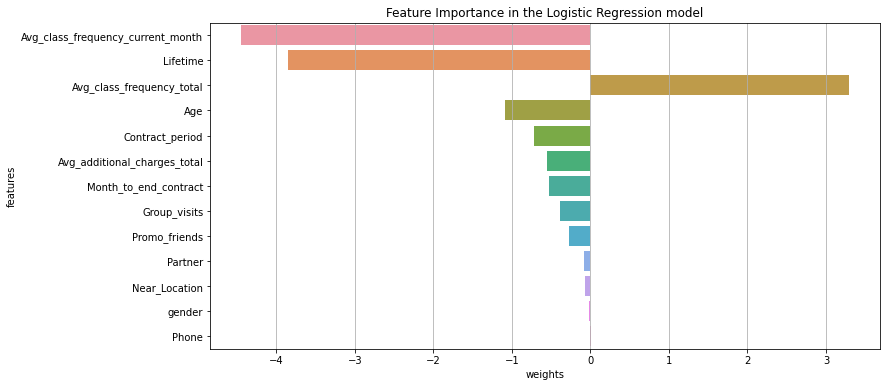

In [25]:
plt.subplots(figsize=(12, 6))
plt.grid()
sns.barplot(data=df, x= df.weights, y=df.features, orient = 'h').set(title='Feature Importance in the Logistic Regression model');


***The analysis of feature importance determined by the LogisticRegression model:***
Inspecting the coefficients attributed to each feature shows that the largest weights were given to:
- 'Lifetime': -3.84628138
- 'Avg_class_frequency_current_month': -4.45423124
 A decrease in these measures mean a higher predicted churn rate.
- Avg_class_frequency_total got a lower score (3.29978832), but here the relation is positive (I do not understand why..- A rise in the average total frequency isn't correlated with a rise in churn).

These features, however, were most influential in predicting churn, and should be taken into account.
Also, since we have many predicting factors in the model, and a handful of them  do not seem to contribute much to the model, it might be wise to drop them from the model and maybe strengthen this way the predictive power of the model (?)

## Step 4. Creating user clusters

Set aside the column with data on churn and identify object (user) clusters:
•	Standardize the data.
•	Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.
•	Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)
•	Look at the mean feature values for clusters. Does anything catch your eye?
•	Plot distributions of features for the clusters. Do you notice anything?


In [26]:
# Standardize the data
sc = StandardScaler()
X_sc = sc.fit_transform(X)


In [27]:
# Use the linkage() function to build a matrix of distances based on the standardized feature matrix
linked = linkage(X_sc, method = 'ward') 
linked

array([[9.70000000e+01, 3.22200000e+03, 1.00990653e-01, 2.00000000e+00],
       [2.61000000e+02, 3.17900000e+03, 1.22634574e-01, 2.00000000e+00],
       [8.90000000e+02, 1.75000000e+03, 1.28123291e-01, 2.00000000e+00],
       ...,
       [7.98700000e+03, 7.99500000e+03, 8.38725499e+01, 2.65600000e+03],
       [7.98800000e+03, 7.99600000e+03, 8.89563592e+01, 3.03400000e+03],
       [7.99200000e+03, 7.99700000e+03, 1.04627601e+02, 4.00000000e+03]])

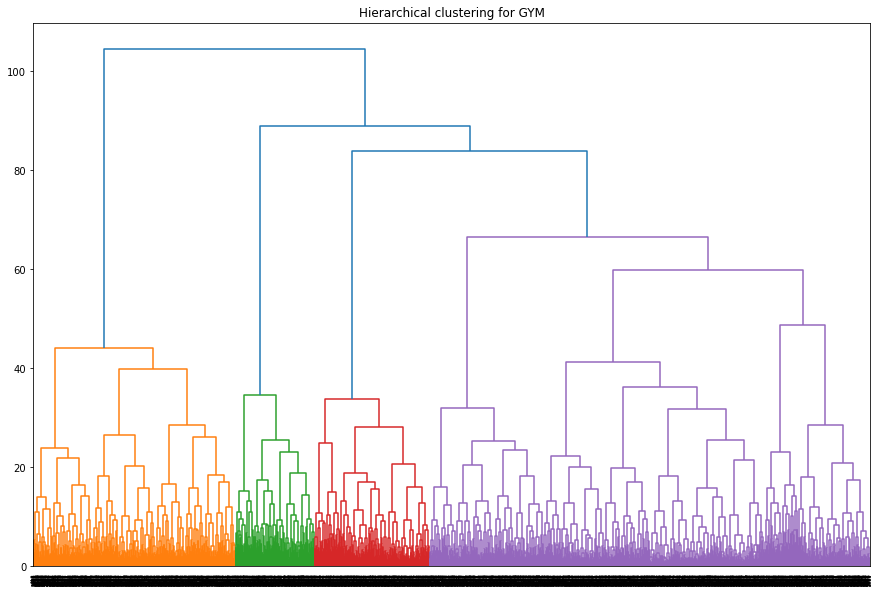

In [28]:
# plot a dendrogram
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show();


In [29]:
#Train the clustering model with the K-means algorithm and predict customer clusters
km = KMeans(n_clusters = 5, random_state = 0) 

# applying the algorithm to the data and forming a cluster vector
labels = km.fit_predict(X_sc) 


In [30]:
gym['cluster_km'] = labels
gym.head(3)

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   

   Churn  cluster_km  
0      0           1  
1      0           0  
2      0           3

In [31]:
# Looking at the mean feature values for clusters:
clusters= gym.groupby('cluster_km', as_index=False).mean()
clusters.T

0           1           2  \
cluster_km                           0.000000    1.000000    2.000000   
gender                               0.502970    0.522078    0.495050   
Near_Location                        0.959406    0.862338    0.000000   
Partner                              0.783168    0.470130    0.463366   
Promo_friends                        0.574257    0.306494    0.079208   
Phone                                1.000000    0.000000    1.000000   
Contract_period                     10.889109    4.787013    2.352475   
Group_visits                         0.542574    0.425974    0.215842   
Age                                 29.982178   29.301299   28.477228   
Avg_additional_charges_total       160.761016  143.957664  135.457501   
Month_to_end_contract                9.954455    4.475325    2.198020   
Lifetime                             4.736634    3.924675    2.809901   
Avg_class_frequency_total            1.982055    1.847220    1.660461   
Avg_class_frequency_current_month    1.974789    1.716369    1.477324   
Churn                                0.027723    0.267532    0.443564   

                                            3           4  
cluster_km                           3.000000    4.000000  
gender                               0.485737    0.559666  
Near_Location                        1.000000    0.976134  
Partner                              0.350238    0.356802  
Promo_friends                        0.240095    0.230310  
Phone                                1.000000    0.998807  
Contract_period                      1.948494    2.669451  
Group_visits                         0.341521    0.473747  
Age                                 28.167987   30.125298  
Avg_additional_charges_total       131.622204  161.657905  
Month_to_end_contract                1.856577    2.459427  
Lifetime                             2.440571    4.898568  
Avg_class_frequency_total            1.247634    2.852002  
Avg_class_frequency_current_month    1.012983    2.850161  
Churn                                0.514263    0.068019

Results summary:
Looking at the 5 clusters we can start seeing the different user characteristics:
- **Cluster #0**: These customers are good to have :-), Compared to the other clusters, they tend to join the gym through a friend's promo coupon and are working in a partner company. 96% of them live or work nearby. They tend to register to the longest memberships and visit group sessions more than other culsters. They also tend to pay quite high additional charges. They are one of the most loyal customers- They joined almost 5 months ago, their attendence frequency is stable and one of the highest, and their churn is the lowest.
- **Cluster #1**:Unlike cluster 0, most of cluster 1 customers don't tend to join through a friend's promo coupon and don't work in a partner company. Also, only 86% of them live or work nearby. Unlike all other clusters, these customers don't give their phone number- which is worth paying attention to. These costomers tend to register to medium-short membership periods, almost half of them (43%) attend group sessions, and their mean visit frequency is medium-high (1.7 a week). They also spend a medium high amount of money on additional activities. Their mean churn rate is  as the general churn rate (26%). 
- **Cluster #2**: These customers are the only ones living or working far away from the gym. They did not join through a promo coupon, and a little more than half of them do not work in a partner company. These customers tend to register for short periods, 80% of them do not participate in group sessions, but they arrive in a mean frequency of 1.66 a week, and the churn rat is high- 44%. 
- **Cluster #3**: This cluster of customers is the most prone to quitting cluster. It has the largest churn rate- 51%- more than half of the new users quit. These customers have a slightly higher women rate. All of them live or work near the gym, but the majority of them do not join through a friend's coupon (76%), and do not work i a partner company (65%). They are slightly younger than other clusters, they are the newest customers, they registered to the shortest membership periods, they arrive once a week (the lowest frequency) and they spend the smallest amount of money on additional charges.
- **Cluster #4**:This cluster also reflects "good customers": In this cluster there is a slightly higher men rate, and of slightly older age. 97% of them live or work nearby, but they did not join through a coupon nor a partner company (65% and 77% respectively). They tend to register to short period memberships, but purchase on average the highest amount of additional services. 47% of them arrive to group sessions, and in general they arrive on average 2.85 times a week (the highest frequency and most stable). Churn rate is one of the lowests. 


#### Plot distributions of features for the clusters

Categorical features by cluster number:


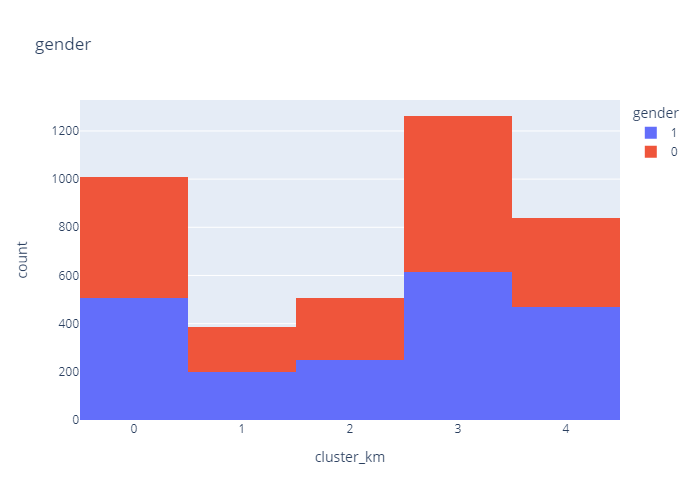

Categorical features by cluster number:


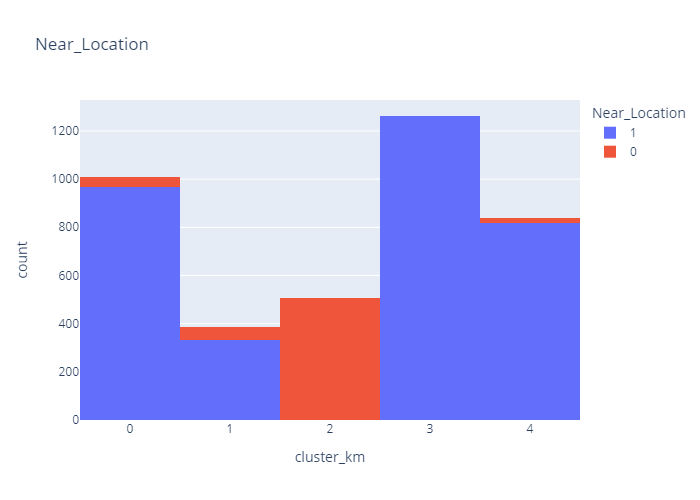

Categorical features by cluster number:


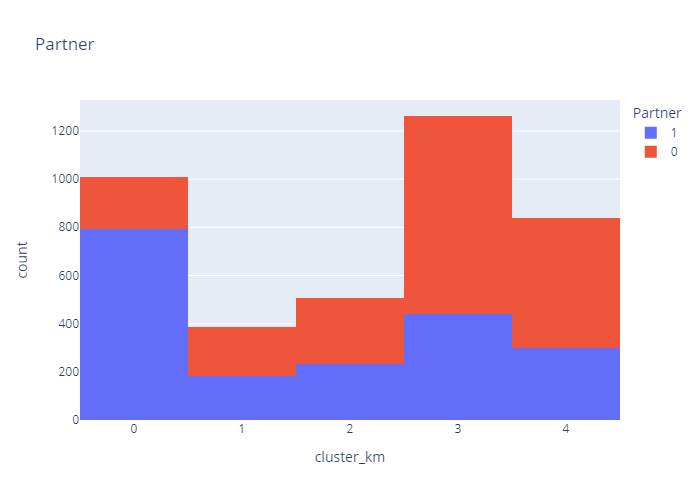

Categorical features by cluster number:


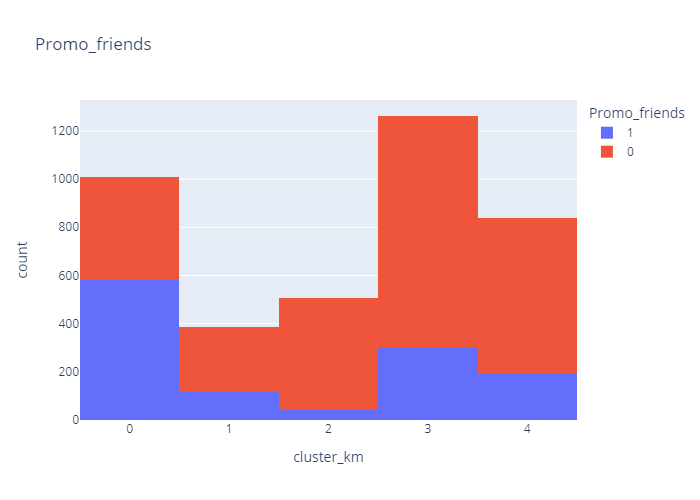

Categorical features by cluster number:


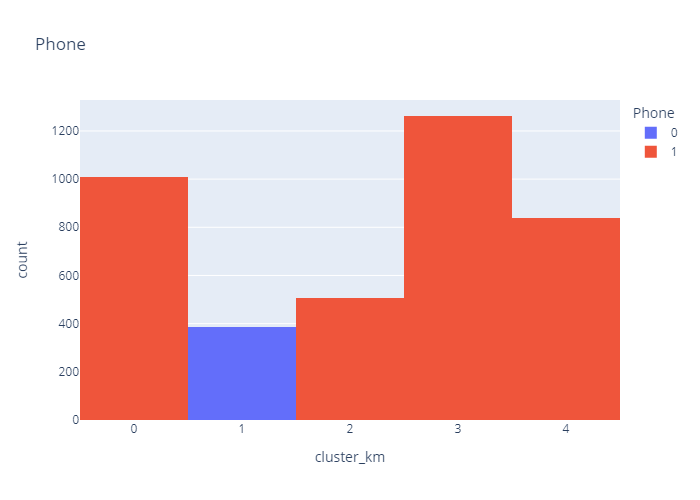

Categorical features by cluster number:


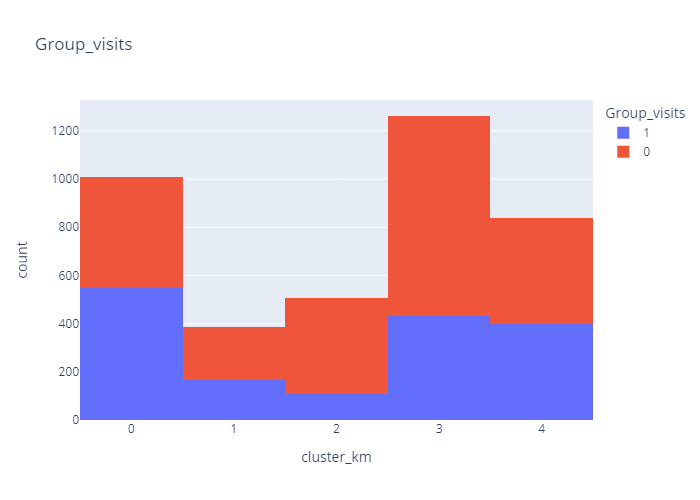

Categorical features by cluster number:


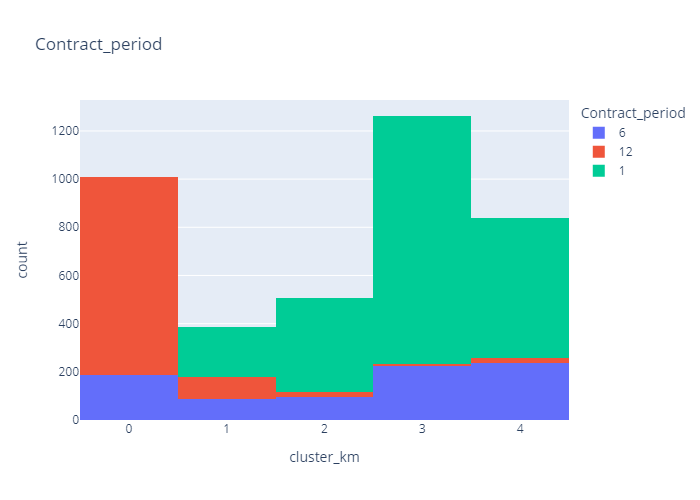

Categorical features by cluster number:


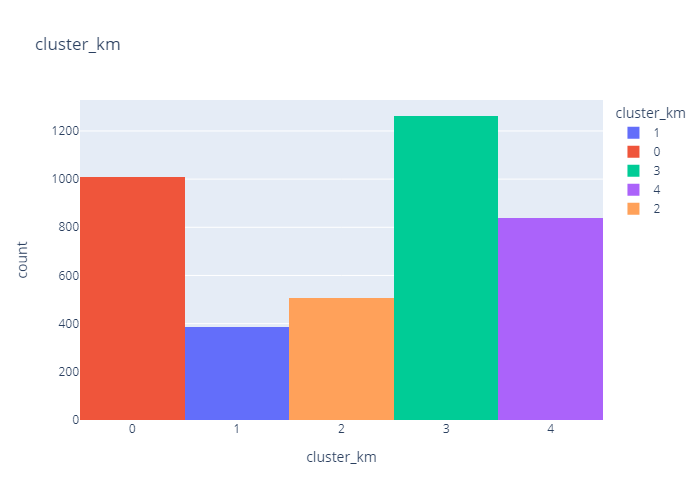

In [33]:
# plotting a histogram of data on categorical features:
gym_cat = gym[['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Contract_period', 'cluster_km']]
for col in gym_cat.columns:
    print("Categorical features by cluster number:")
    fig= px.histogram(gym_cat, x= 'cluster_km', color= col, title= col) 
    fig.show("png");
    
    

#### A few words:
- Clusters are not of the same size: The largest cluster is 3 (1262) > followed by cluster 0 (1010) > then cluster 4 (838) > cluster2 (505) and the smallest is cluster 1 (385).
- Some features distribute differently across the 5 clusters:
    - Near Location- only cluster 2 come from far.
    - Partner: Cluster 0 has a predominance of customers that work in a partner conpany, where as cluster 4 and especially 3- the opposite.
    - Promo friends: Only cluster 0 has a slightly larger portion of customers joining the gym through a friend. The rest of the clusters are dominated by customers that did not use a coupon.
    - Group visits- Except for cluster 0, in all clusters more than 50% of customers don't arrive to group sessions. It is especially prominent for clusters 2 and 3.
    - Contract period- Cluster 0 stands out having most of their customers register for 12 months and the rest for 6 monts (in a ratio of arround 80 to 20). The rest of the cluster hardly have any 12 months customers, and the short 1 months period is the dominant choice.


Numerical features by cluster number:


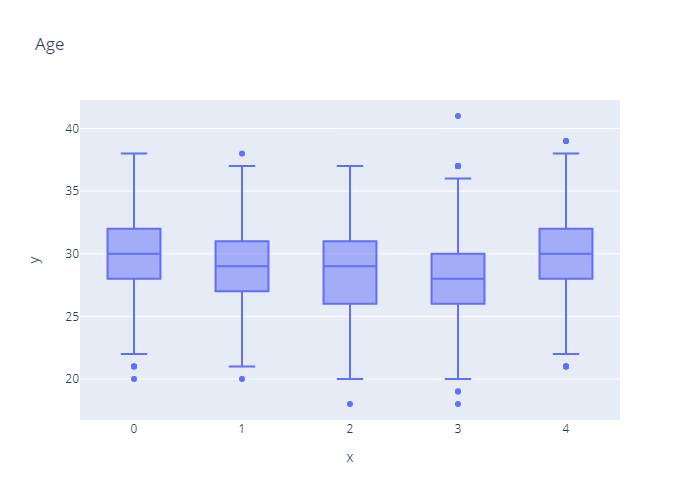

Numerical features by cluster number:


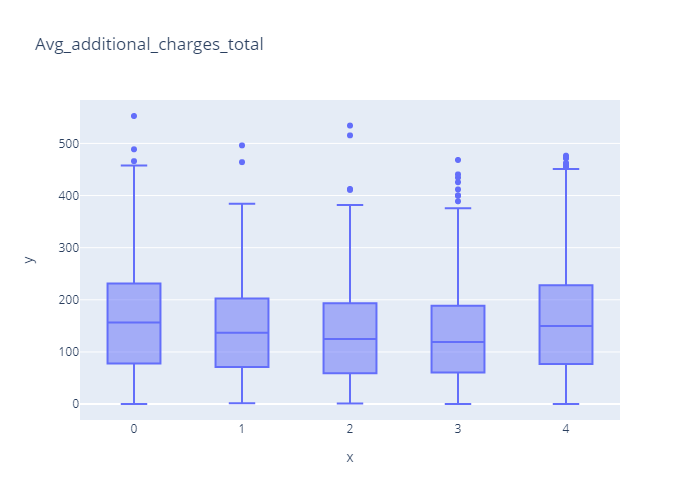

Numerical features by cluster number:


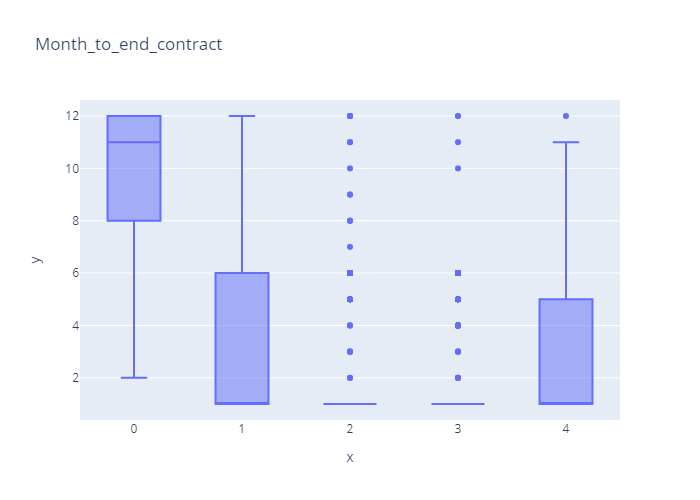

Numerical features by cluster number:


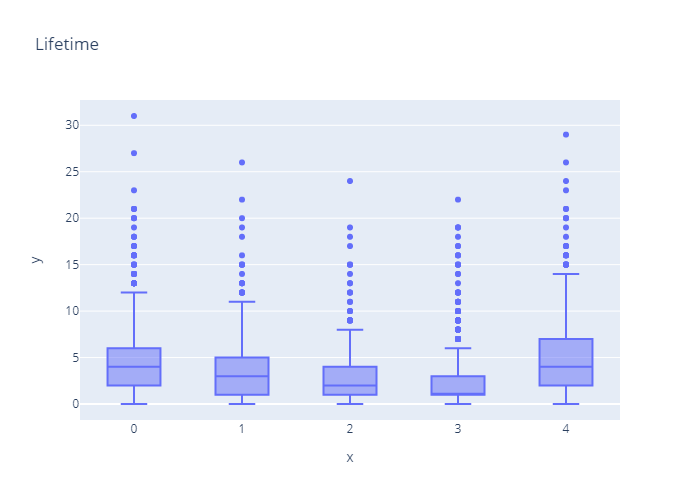

Numerical features by cluster number:


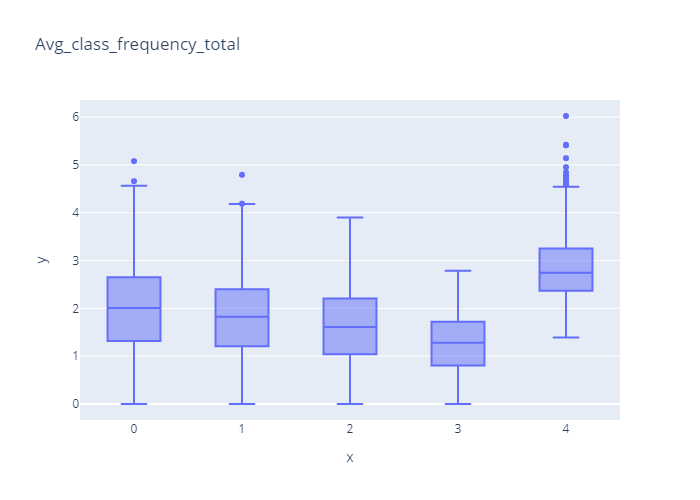

Numerical features by cluster number:


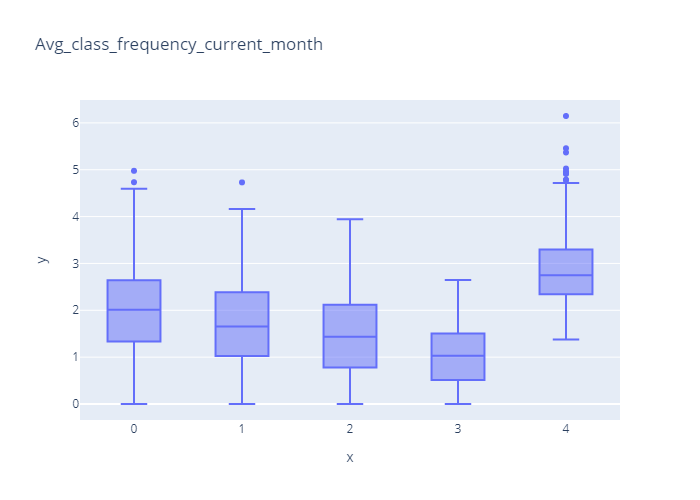

Numerical features by cluster number:


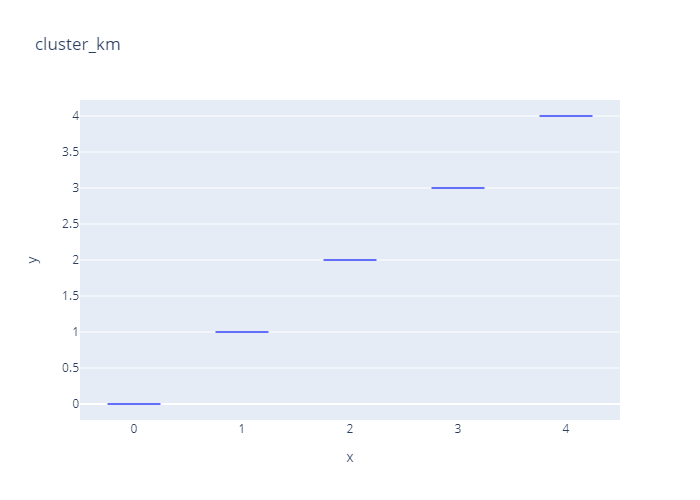

In [35]:
# plotting box-plots for data of numerical features:
gym_num = gym[['Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'cluster_km']]
for col in gym_num.columns:
    print("Numerical features by cluster number:")
    fig= px.box(x= gym_num['cluster_km'], y= gym_num[col], title= col)
    fig.show("png");

#### Words of explanation:
- Age: Clusters 0 and 4 tend to be slightly older, and cluster 3- slightly younger.
- Additional charges: Clusters 0 and 4 tend to pay slightly more than the rest of them.
- Months to end contract- Since cluster 0 has the longests contracts, they also have the longest period to end them. Clusters 1 and 4 still have a few months to go, and for clusters 2 and 3 - most of them are on their last (or only) month.
- Lifetime- Clusters 0 and 4 have the vetren customers from 2 and a half years ago, the rest of the clusters' customers have joined a bit later. Clusters 2 and 3 are predominated by fairly new customers (3-4 months at best).
- Average class frequency- Cluster 4 stands out having many clients coming on average 2.3 to 3.3 times a week. Cluster 3 clients train in the gym in the lowest frequency (0.5-1.5 a week). A drop in training frequency this month is observed for clusters 2 and 3, which puts them at risk of churning.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



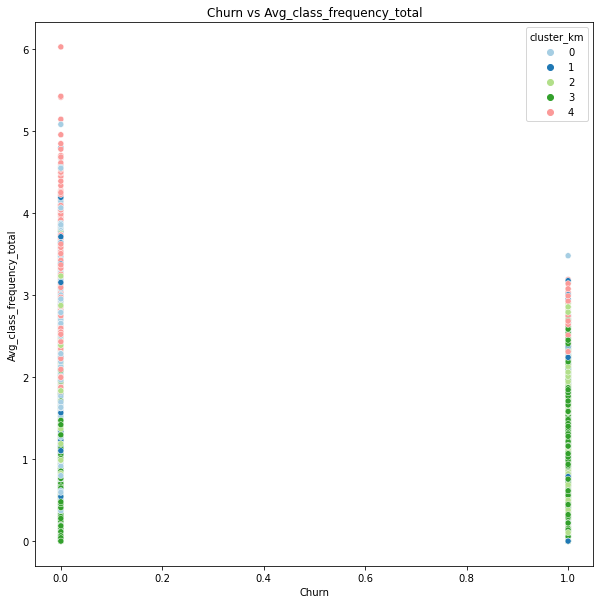

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



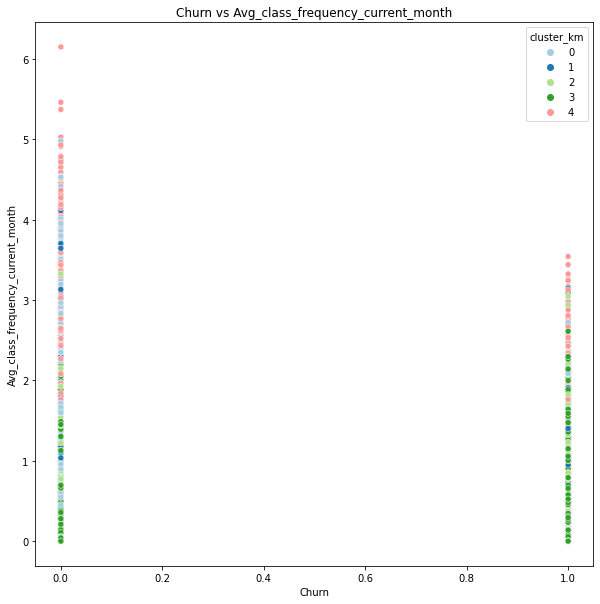

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



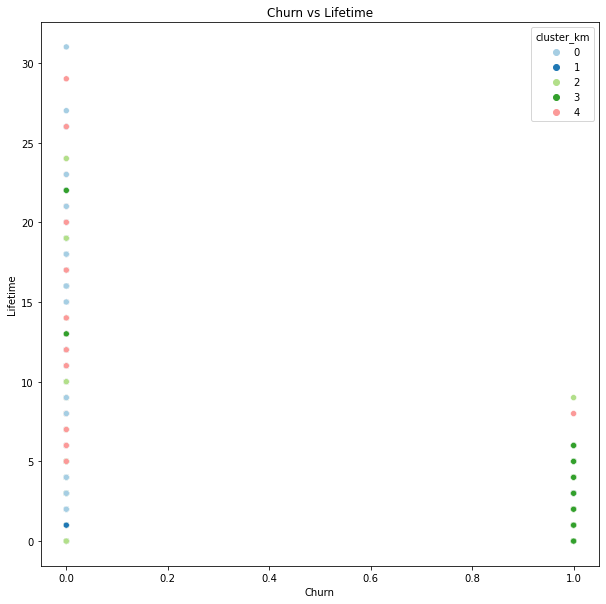

In [36]:
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],
          hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

show_clusters_on_plot(df= gym, x_name= 'Churn', y_name='Avg_class_frequency_total', cluster_name= 'cluster_km')
show_clusters_on_plot(df= gym, x_name='Churn', y_name='Avg_class_frequency_current_month', cluster_name='cluster_km')
show_clusters_on_plot(df= gym, x_name='Churn', y_name='Lifetime', cluster_name='cluster_km')

Here I chose the features that were most heavily loaded in our model and checked their possibly relations with Churn for the different clusters.
The total training frequencyXChurn scatterplot shows that churn correlates with low frequency, with the highest rates of churn seen in clusters 2 and 3. The same pattern was observed for life time- high churn correlated with low lifetime (clusters 2 & 3).


## Step 5. Conclusions and basic recommendations on working with customers

Model Fitness chain has digitized a number of its customer profiles in order to fight churn rates.
Churn was defined as not showing up for a month.
Our task was to:
- choose a model that best predicts churn rates, 
- analyze the factors that impact churn most, 
- identify typical user portraits,  
- analyze them and come up with a customer retention strategy.

In this project we anayized the training behavior and personal profile of 4000 customers, in the current month and the preceding one.

#### Choosing a predictive model:
Based on the metrices chosen, a Logistic Regression model was able to yield predictions that were slightly more accurate than the ones yielded by a Random Forest model. 
- *Accuracy*: Both models got a high accuracy score:  92% of all predictions were accurate. 
- *Precision*- The two models yielded very similar precision scores (84%- 85%): 15%-16% of predictions of churn were acctually non-churn customers.
- *Recall*- The two models yielded similar recall scores (81%- 83%): 19%-17% chance of missing a true churn).

We found it important to minimize, as much as possible, the possibilty of not identifying future churn customers (Recall), so we chose the logistic regression model. The option of identifying an active user as a user in risk of quitting the gyme is not as bad. 

Next, we Inspected the coefficients attributed to each feature in the regression model. 
The largest weights were given to:
- 'Lifetime': -3.84628138
- 'Avg_class_frequency_current_month': -4.45423124
 A decrease in these measures meant a higher predicted churn rate.
- Avg_class_frequency_total got a lower score (3.29978832).

Last, we identified clusters of users based on similarities between them on different features.
We managed to identify 5 such profiles, which can be split into 3 churn risk factors.
1. Very low risk:
There were 2 "strong" clusters (#0 and #4): These were identified as loyal customers (very low churn rates and registering before the other clusters). They tended to either register for long membership periods, or had a high attendence frequency. These customers tended to also spend more on additional services.
These customers are probably pleased with the gym, and what is needed for them is mainly a strategy of follow up and maintainance.


2. Medium-low risk:
Cluster 1 was the smallest cluster (N=385: less than 10% of total customers). Their churn rate is average (26%), They regiter for short periods and have a medium sized attendance frequency. Compared with last month we recognized no decresed attendance. 
Unlike all other clusters, these customers don't give their phone number. 
We recommend the same strategy as the previous one, and suggest working harder on getting their phone numbers to increase the sense of community.

3. High risk of churn:
Clusters 2 and 3 show decreased attendance frequencies compared with last month's data. Their churn rates are extremly high and any intervention should primarly target them. 
    - Cluster 3 is the largest cluster (N=1262), and has a churn rate of 51%. The rate of women and younger people is slightly higher than in other clusters. These customers are quite new to this gym, their attendance frequency is the lowest and they registered to short membership periods and they spend the smallest amount of money on additional charges.
    - Cluster 2 is one of the smallest clusters (N=505), with a churn rate of 44%. These customers registered to the gym despite living or working far, but they manage to attend 1.66 times a week. They too registered for short membership periods, and are fairly new to the gym.
    
#### Recommendations:
- Month-to-month follow ups for all churns, to identify drops in attendance.
- It seems that most churn happens with customers at the first months, so i recommend marketing and maintainance strategies to focus on the first 2-3 months: 
 - offering follow up phone calls to customers that wish to recieve them.
 - offering point to customers that have a twice a week attendance rate, that can be used to get additional services (extra membership time, a private lesson etc..).
 - Having seasonal social health events in the gym, focusing on women and 27-29 ages.
 - Looking deeper into cluster 3- the largest cluster, to try and identify finer tuned features.
 - sending these customers a survey about possible reasons they don't show up/ register for longer periods.

